In [1]:
# %pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\austinsh\AppData\Local\Temp\ipykernel_28556\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Set max columns to display
pd.set_option('display.max_columns', None)

In [4]:
#df_outlierHandling = pd.read_csv('/workspaces/codespaces-jupyter/Final Machine/Interpolated LIMS/df_outlierHandling.csv')

df_outlierHandling = pd.read_csv(r'C:\Users\austinsh\Project-OptiC4\III Models\3 Model C10\5 Preprocessing - Slecected Features\Continuous Data\adjusted_Limits.csv')

# Print descriptive statistics for df_outlierHandling
df_outlierHandling.describe()

Decanol    425_pct_Al       M_Value    C4_pct_Eth    C4_pct_H2O  \
count  61780.000000  61780.000000  61780.000000  61780.000000  61780.000000   
mean       3.210061      6.151130      3.630339      1.487958     21.459292   
std        1.780261      0.328232      0.767623      3.542095      4.588811   
min        0.000000      0.155707      0.571967      0.001000      0.057000   
25%        1.870000      6.006787      3.503150      0.635244     18.882825   
50%        3.003215      6.146450      3.589875      1.155465     21.466000   
75%        4.221063      6.307672      3.685142      1.720047     23.330625   
max       10.000000      8.058320     30.115400     77.165000     95.818000   

       HydWtr_pct_Ammonia    C4_pct_Hex   HydWtr_Na2O       DI55102  \
count        61780.000000  61780.000000  61780.000000  61780.000000   
mean             0.986743      0.543822      0.943856      0.942497   
std              0.207158      0.866904      3.919358      0.055173   
min              0.070270      0.000000      0.000000      0.800002   
25%              0.875984      0.332908      0.457197      0.907876   
50%              0.944739      0.435748      0.675002      0.947588   
75%              1.046312      0.538658      0.997518      0.983688   
max              3.744840     13.392400    279.492000      1.133750   

            DI55152       FC55003       FC55009       FC55552       FC55569  \
count  61780.000000  61780.000000  61780.000000  61780.000000  61780.000000   
mean       0.932746   5968.613245    840.662499  35228.360634   6618.701507   
std        0.032408   1082.402076    611.900861   5818.483646    503.165022   
min        0.809662      0.000000      0.000000   7401.960000      0.000000   
25%        0.911563   5417.007500    306.210250  33477.625000   6335.485000   
50%        0.932621   5989.805000    819.517500  37885.650000   6576.830000   
75%        0.953125   6565.375000   1316.670000  39000.000000   6833.360000   
max        1.039590  19438.600000   2886.320000  52000.000000  10503.000000   

           FFC55553      FFC55555       LC90366       LC90368       PI55020  \
count  61780.000000  61780.000000  61780.000000  61780.000000  61780.000000   
mean       0.995065      0.770993     45.496986     36.621850     -1.419447   
std        0.064020      0.029738     28.793346     20.363895      1.157211   
min        0.042564      0.000000      0.000000      0.006367     -7.381060   
25%        0.972764      0.756783     20.124600     19.758500     -2.313045   
50%        0.998556      0.771538     46.219250     41.536300     -1.386425   
75%        1.020430      0.788043     76.432625     52.162075     -0.392438   
max        1.475490      0.998409     87.901600     81.210800      3.374410   

            TC55552       TI55021  
count  61780.000000  61780.000000  
mean     168.149528    223.704269  
std       16.126595     11.528299  
min       98.687500     73.404200  
25%      155.340000    217.477000  
50%      172.371500    220.442000  
75%      180.663000    224.516000  
max      203.179000    344.636000

In [5]:
num_columns = df_outlierHandling.shape[1]
print("Number of features:", num_columns)

Number of features: 22


In [6]:
# # Assuming df_outlierHandling is your DataFrame
# non_date_columns = df_outlierHandling.columns[df_outlierHandling.columns != 'Date']

# # Drop rows where any value (excluding 'Date') is 0 or less
# df_outlierHandling = df_outlierHandling.drop(df_outlierHandling[(df_outlierHandling[non_date_columns] <= 100).any(axis=1)].index)

# df_outlierHandling



In [7]:
df_outlierHandling['Date'] = pd.to_datetime(df_outlierHandling['Date'])
print(df_outlierHandling.dtypes)

# Output after conversion:
# date_datetime64    datetime64[ns]
# date_object        datetime64[ns]
# dtype: object


Date                  datetime64[ns]
Decanol                      float64
425_pct_Al                   float64
M_Value                      float64
C4_pct_Eth                   float64
C4_pct_H2O                   float64
HydWtr_pct_Ammonia           float64
C4_pct_Hex                   float64
HydWtr_Na2O                  float64
DI55102                      float64
DI55152                      float64
FC55003                      float64
FC55009                      float64
FC55552                      float64
FC55569                      float64
FFC55553                     float64
FFC55555                     float64
LC90366                      float64
LC90368                      float64
PI55020                      float64
TC55552                      float64
TI55021                      float64
dtype: object


Skipping datetime column: Date


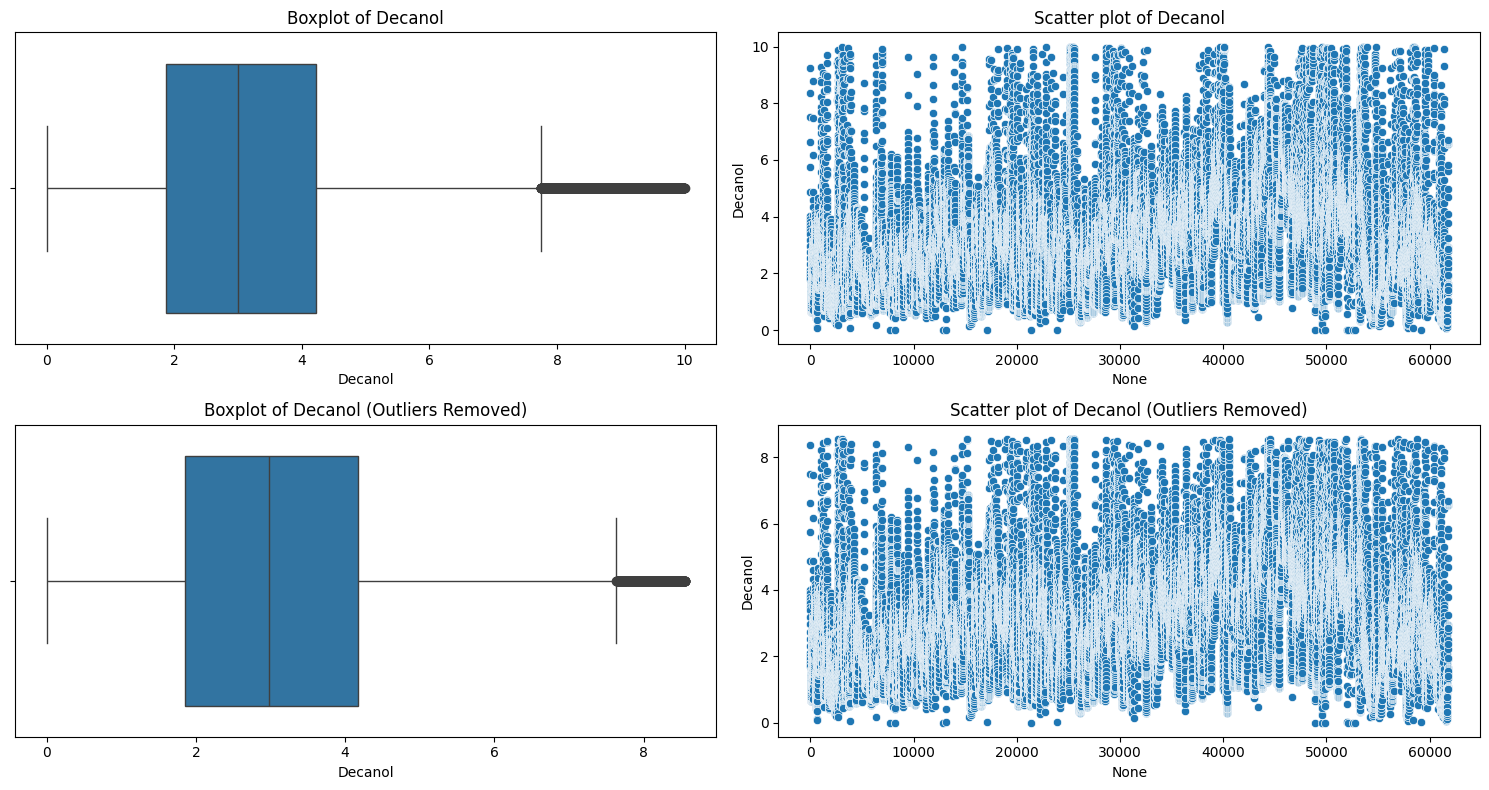

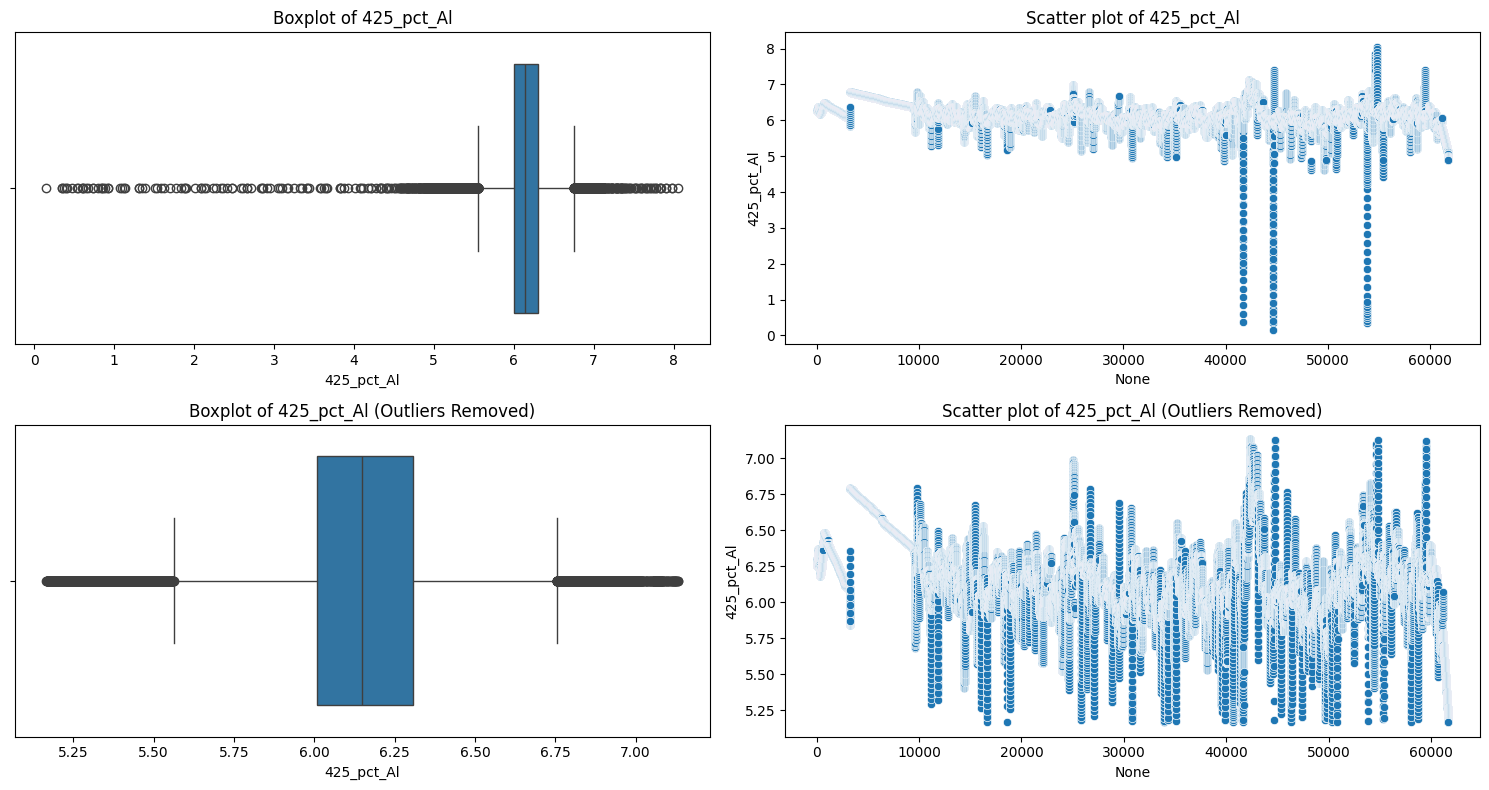

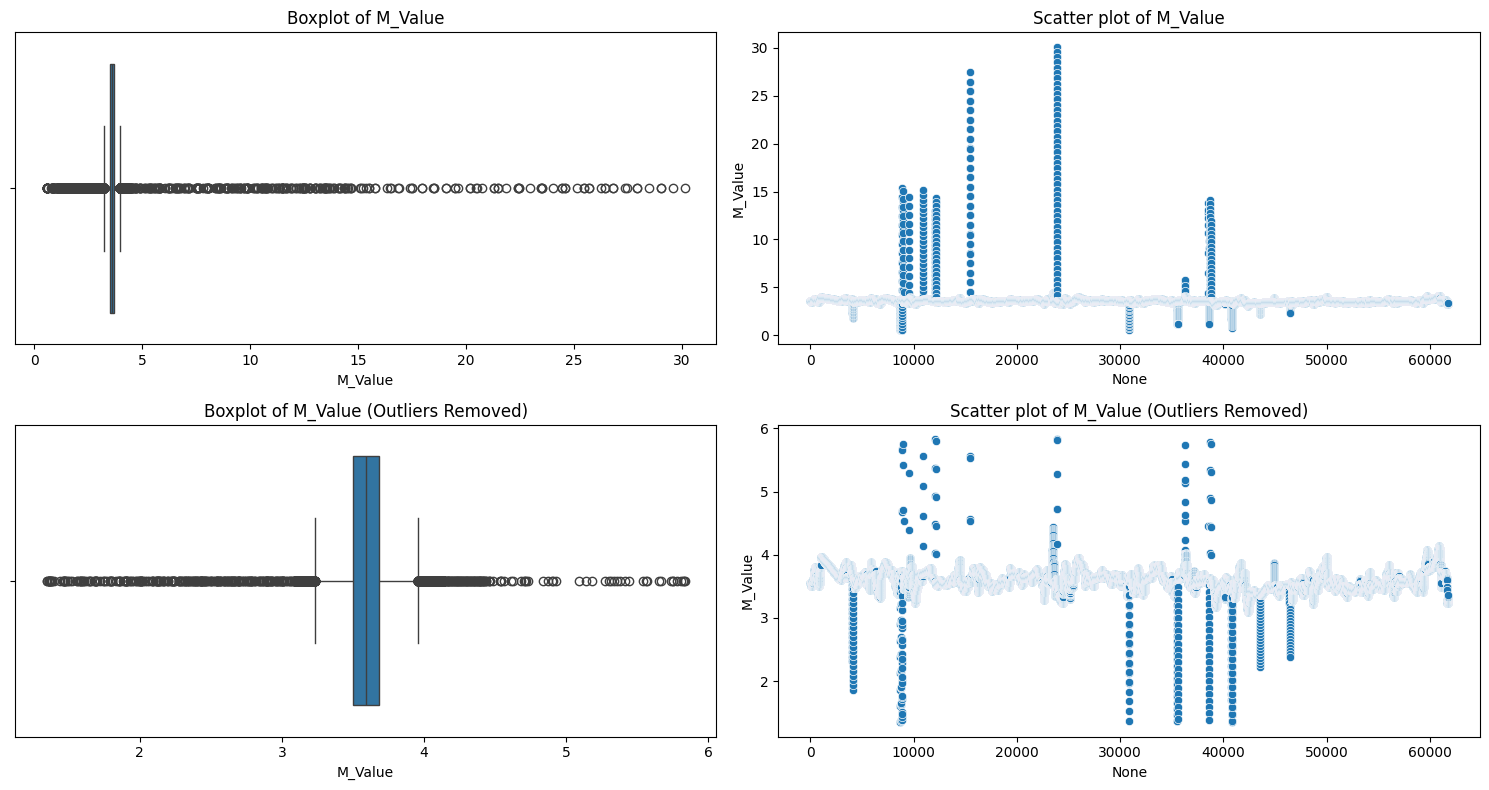

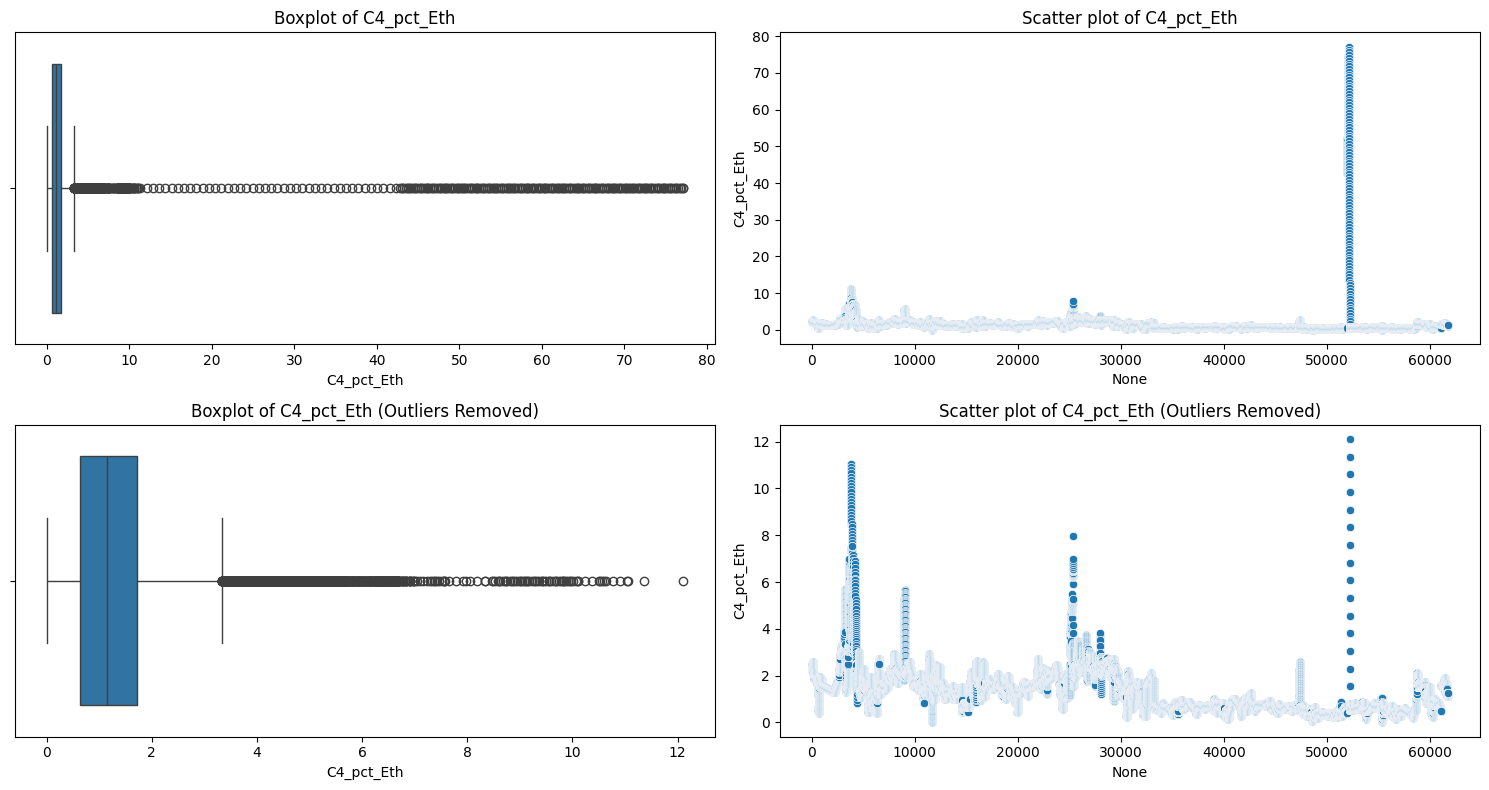

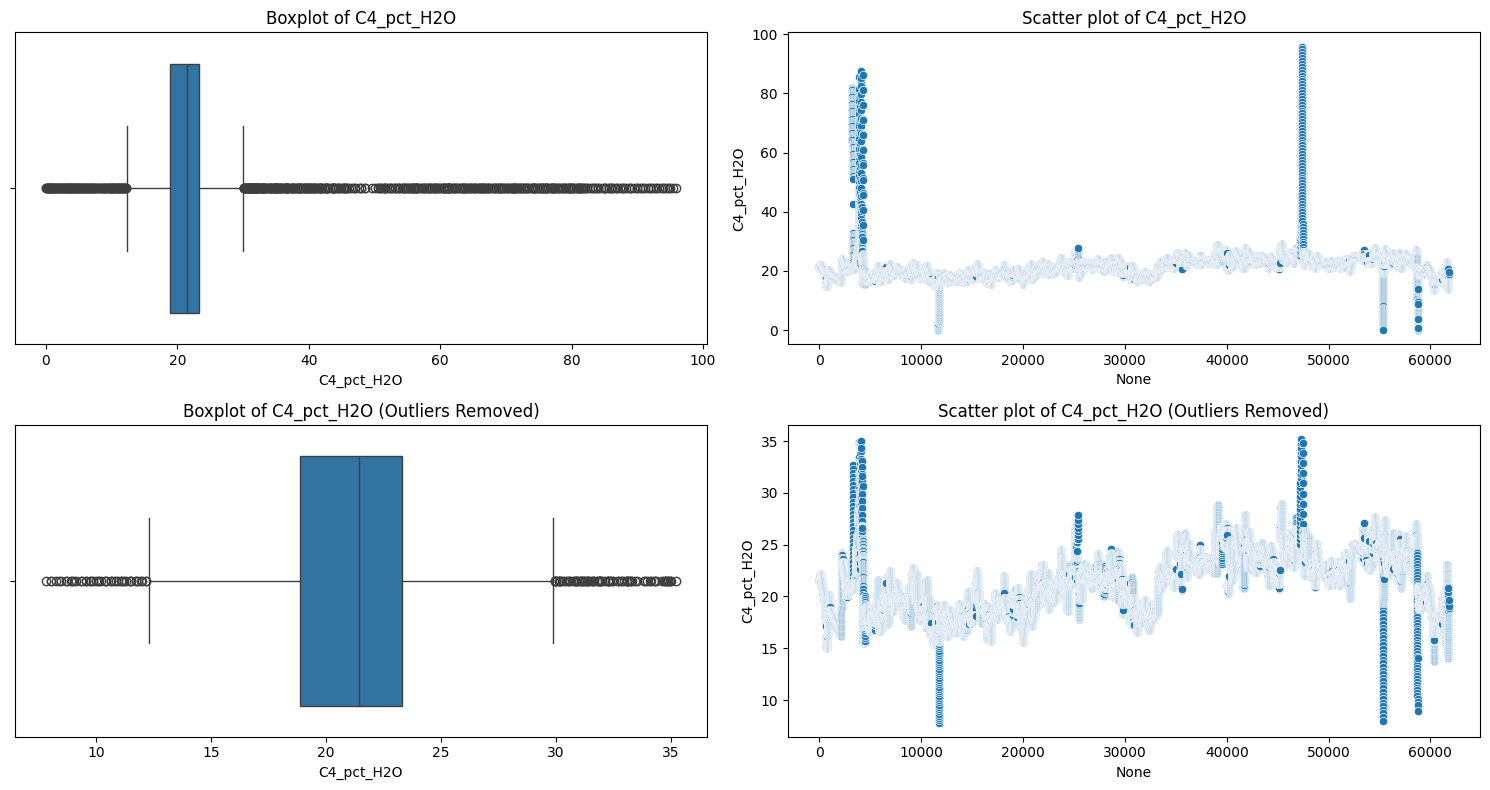

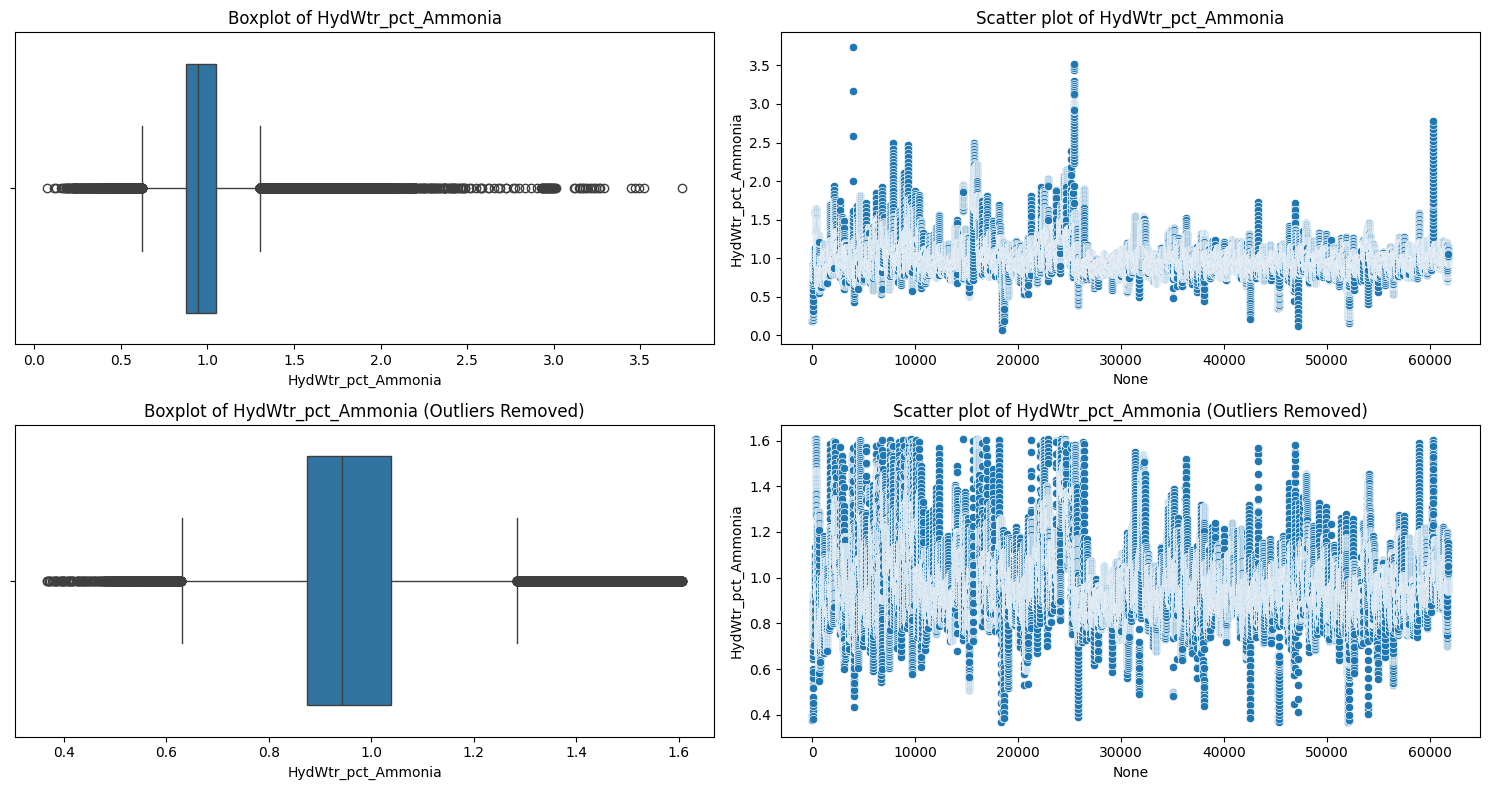

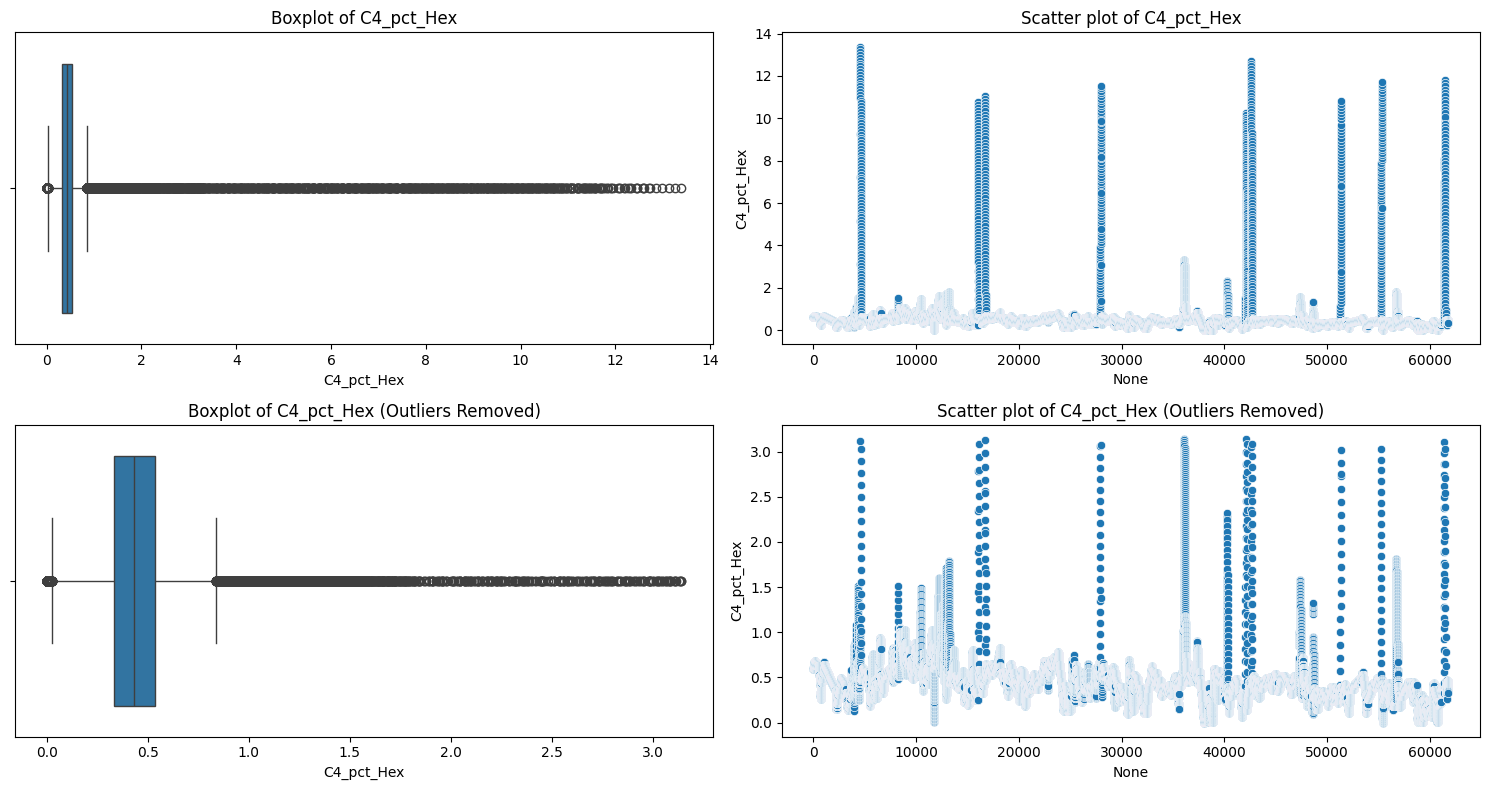

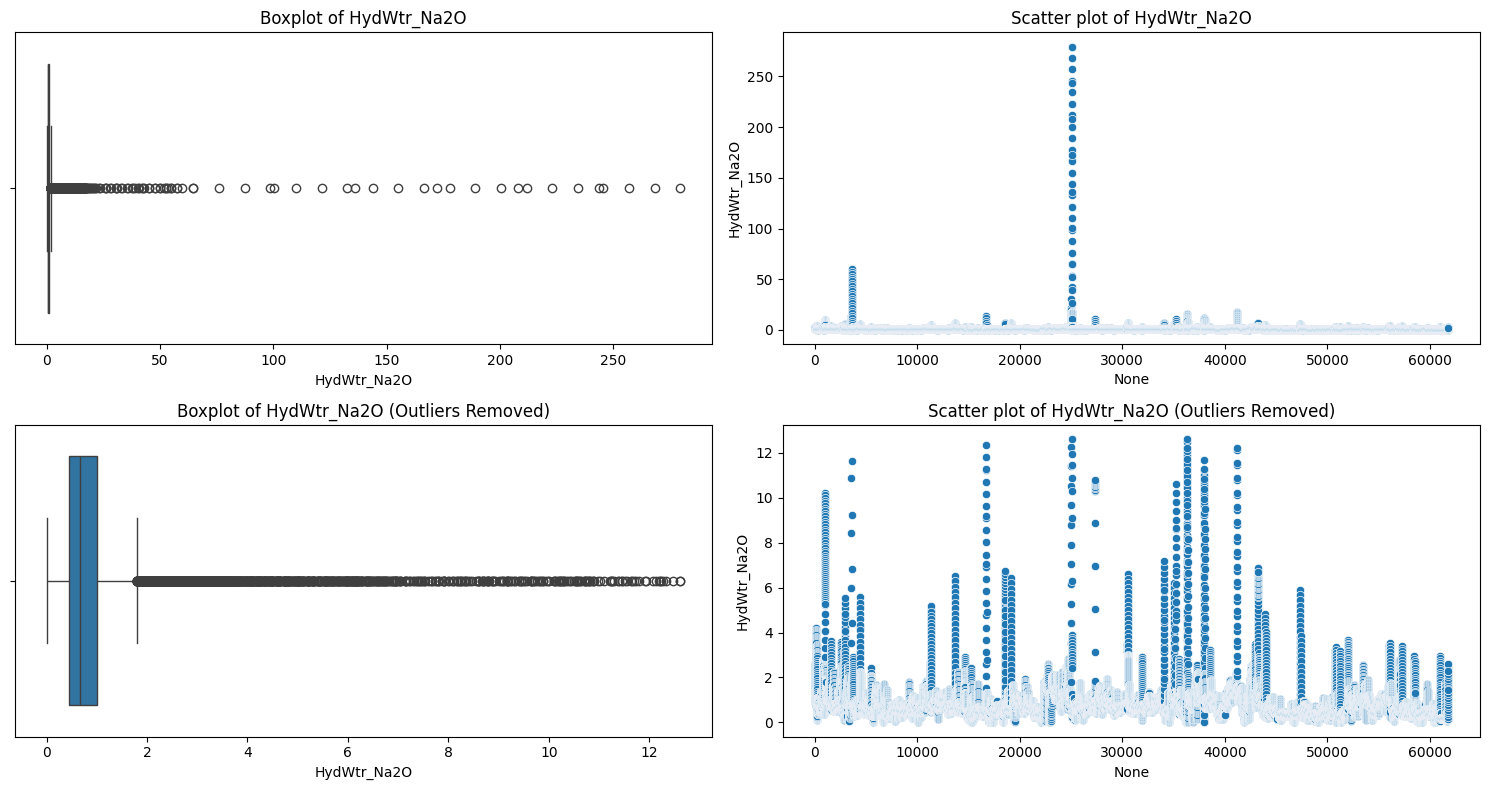

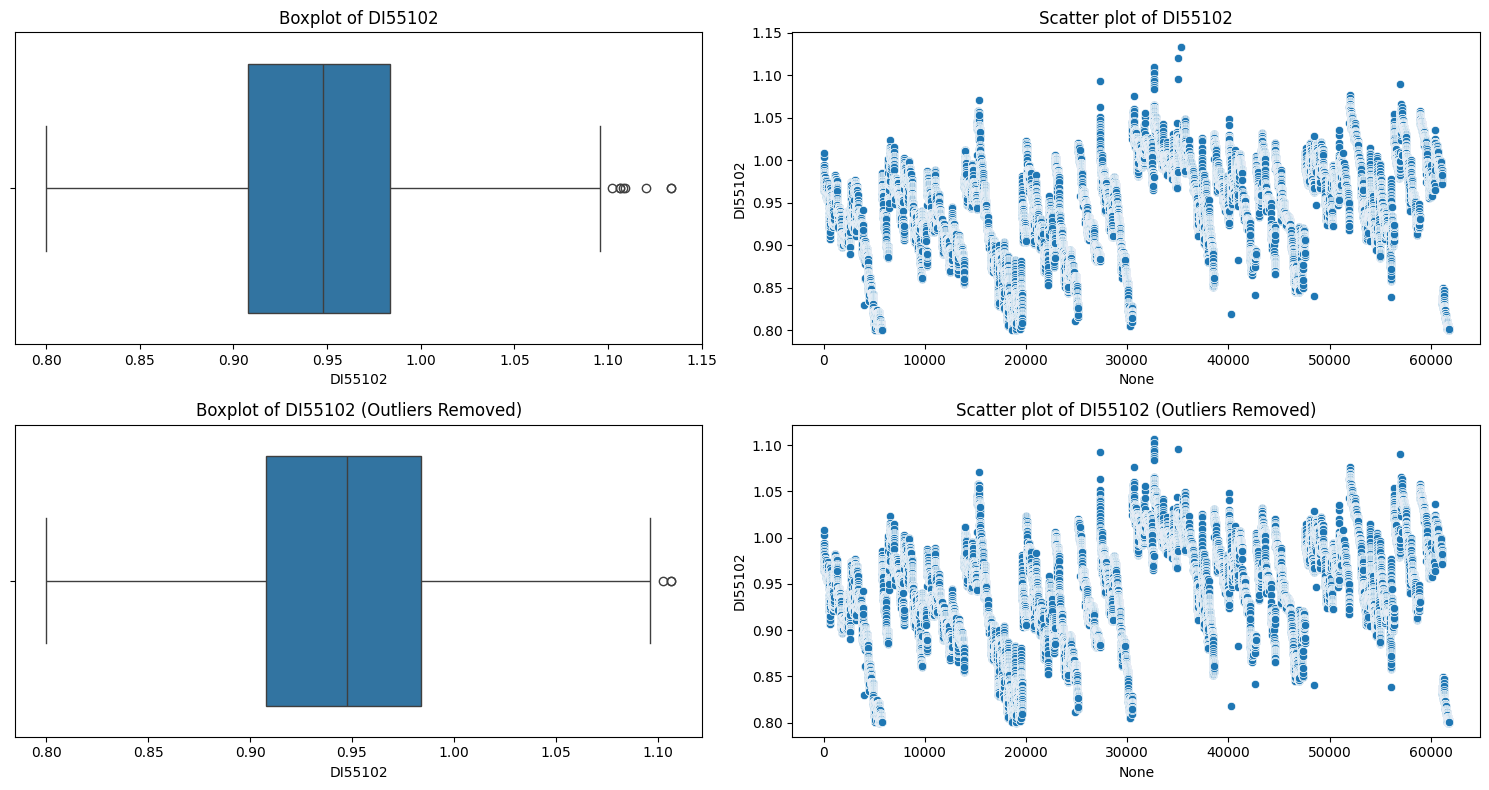

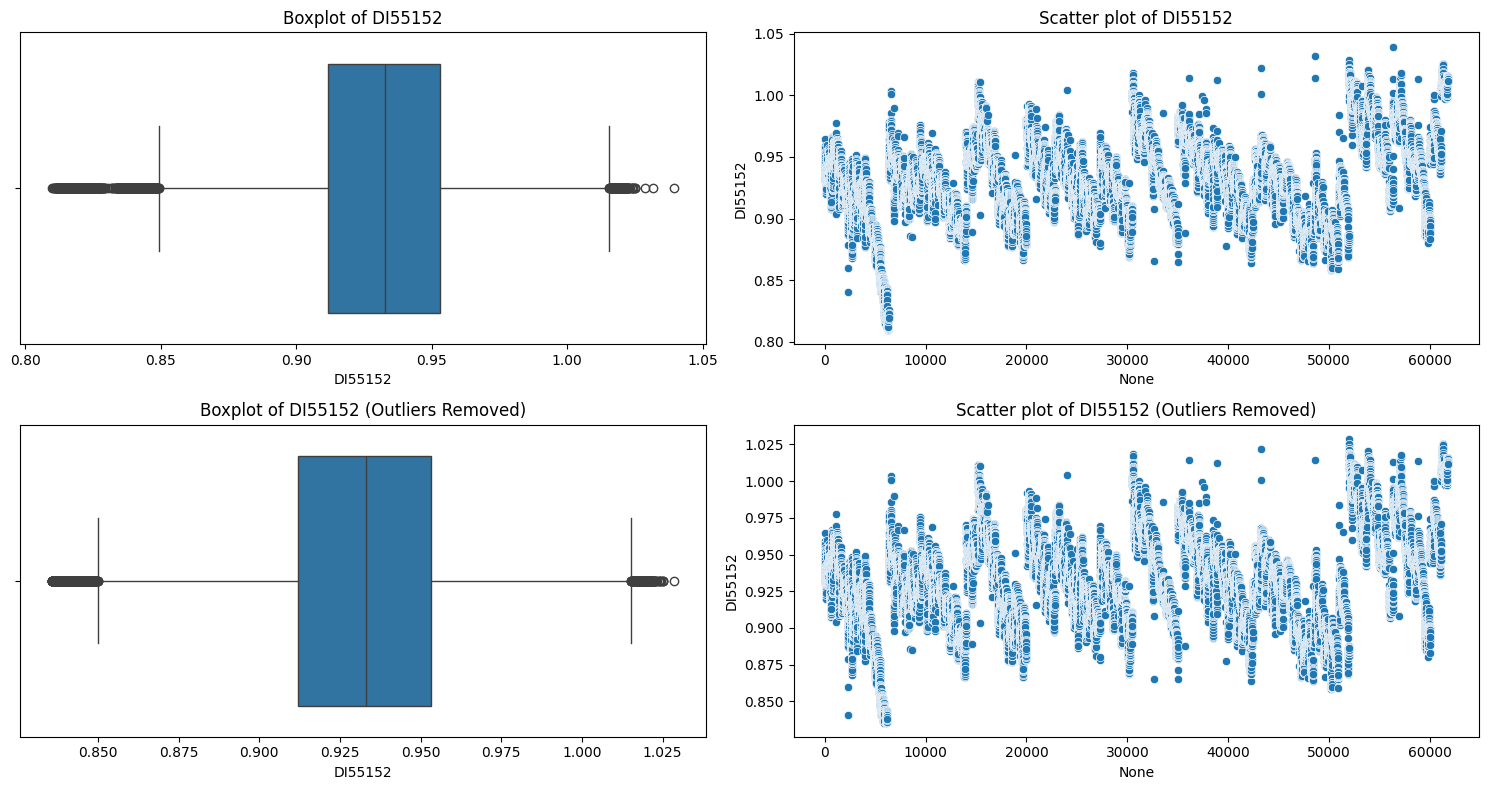

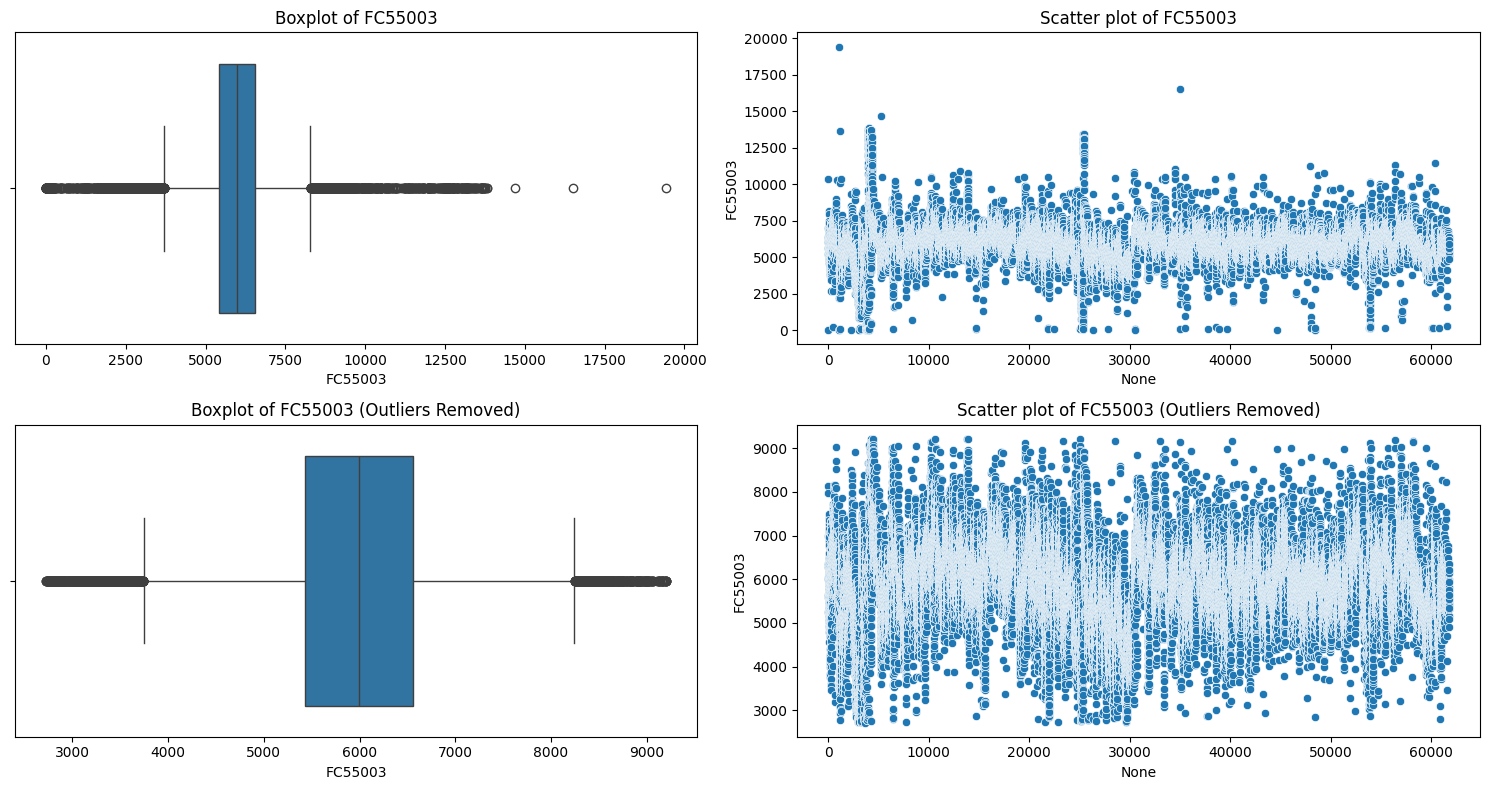

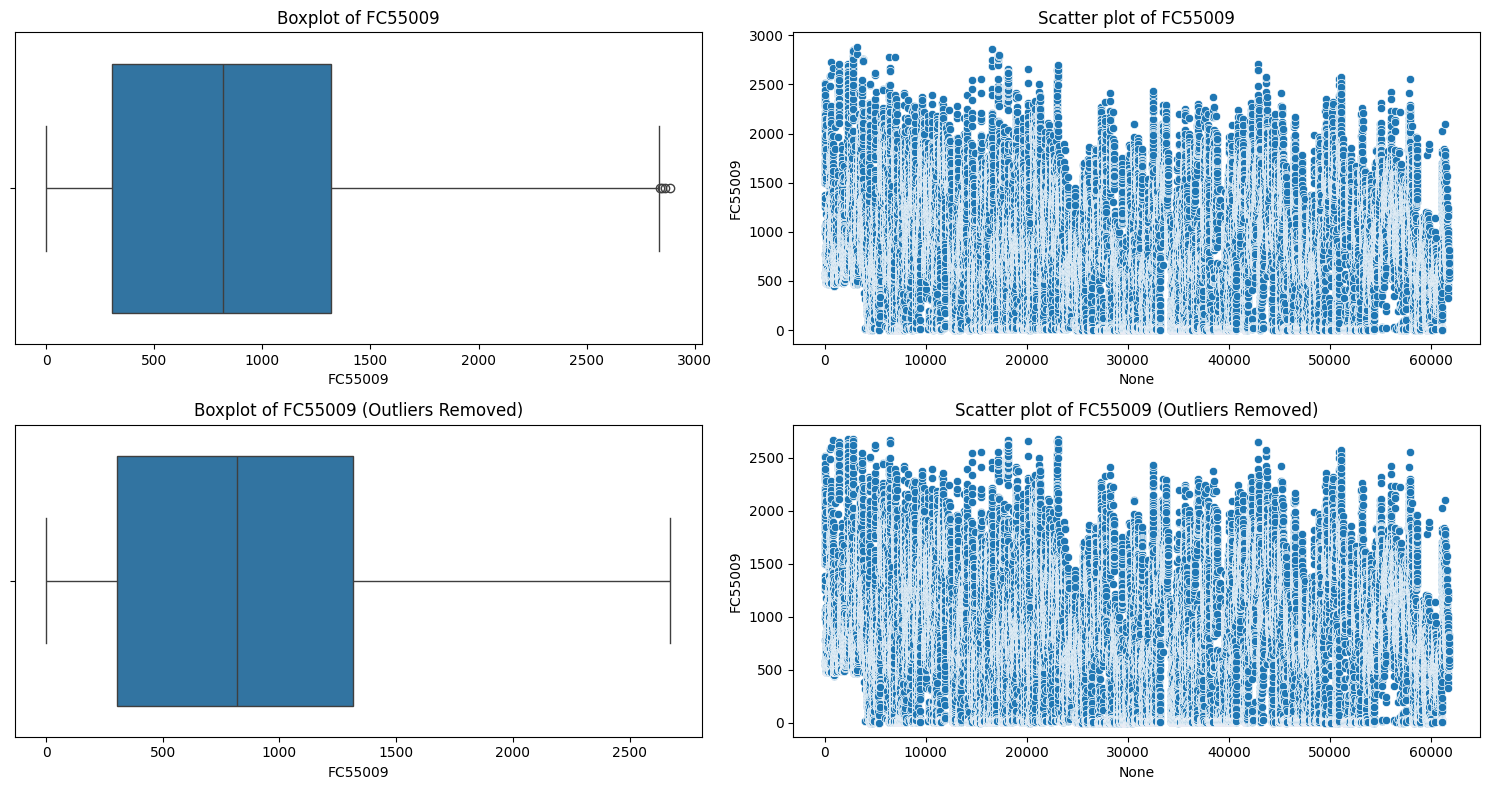

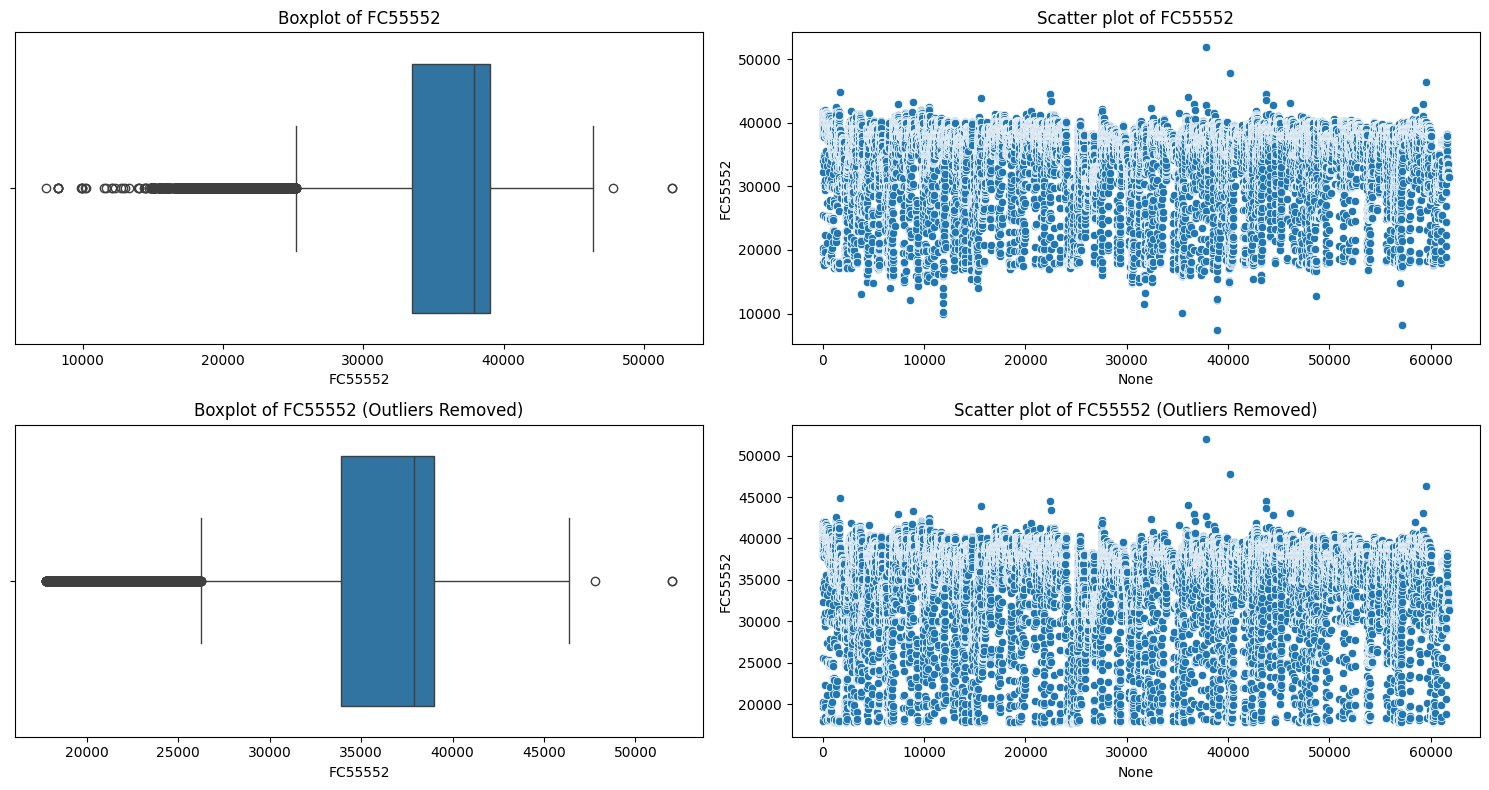

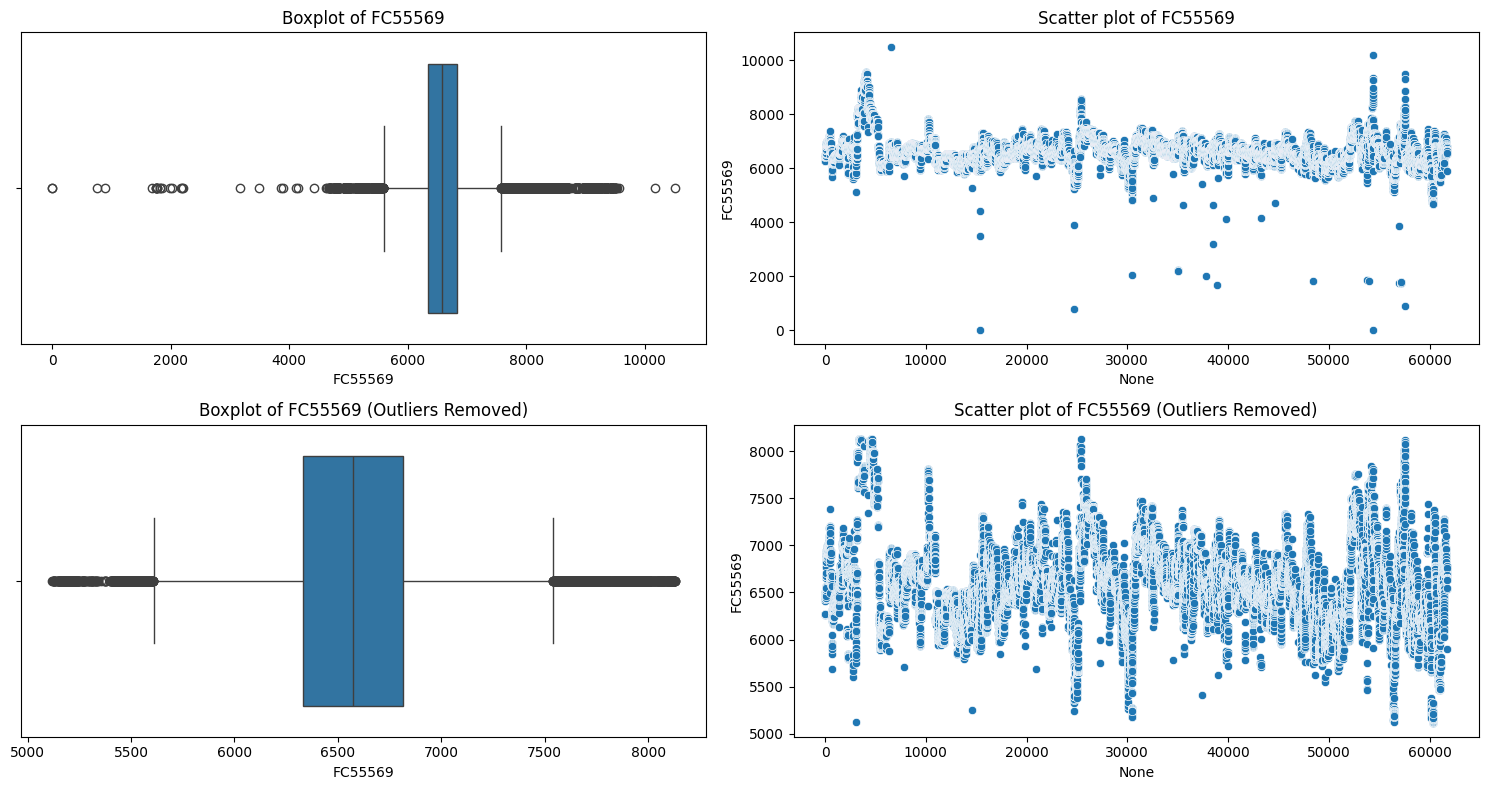

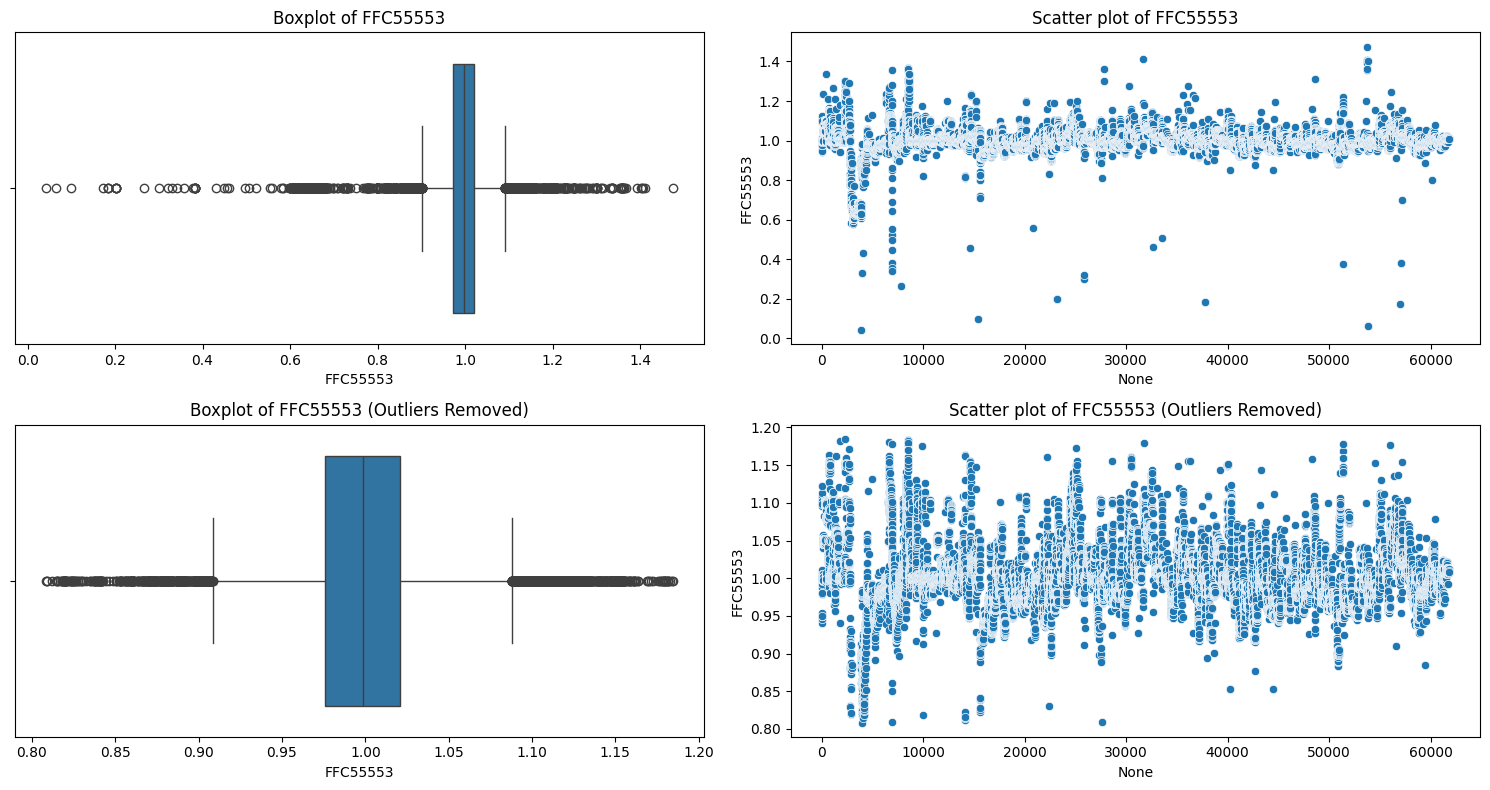

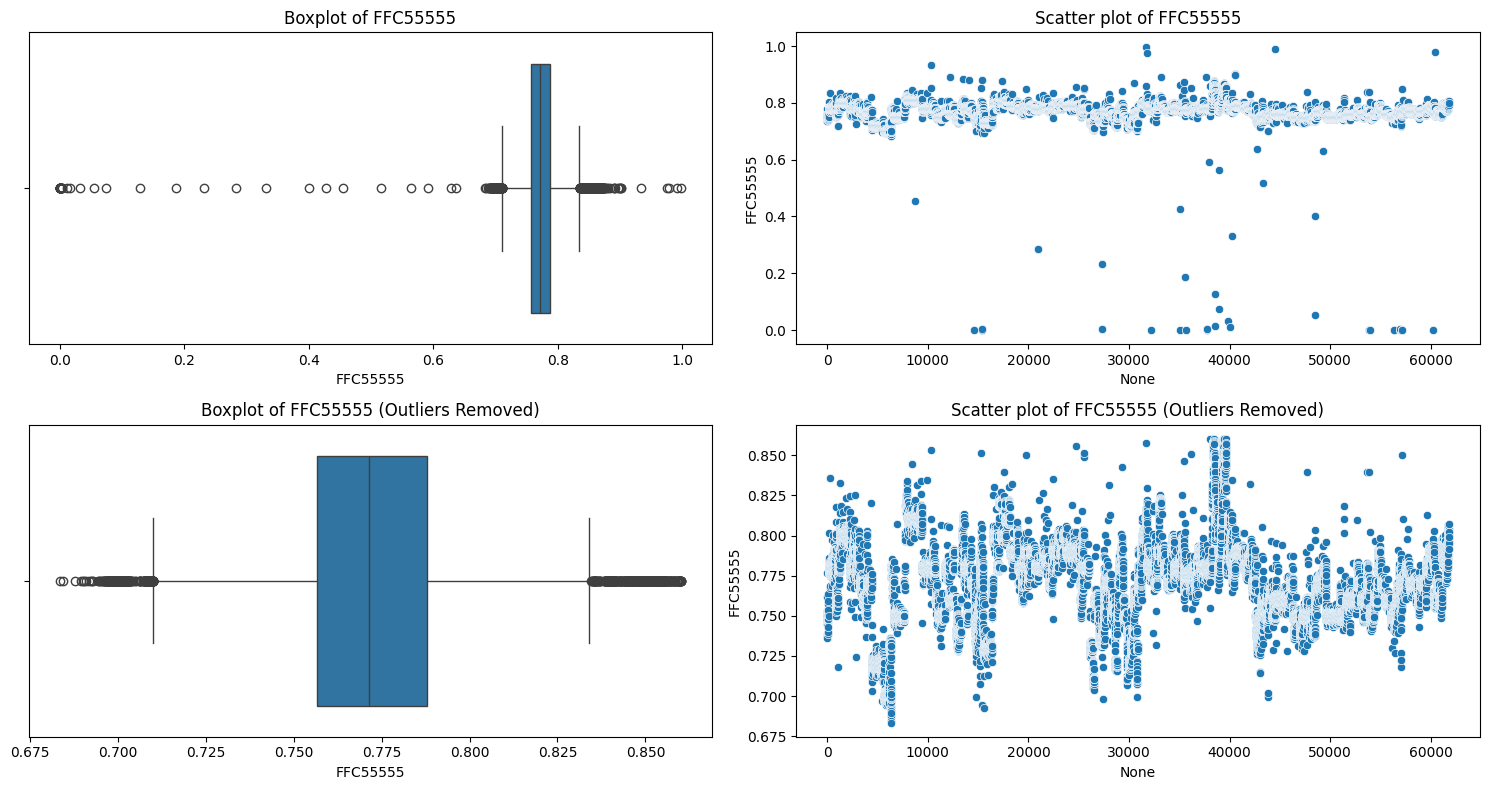

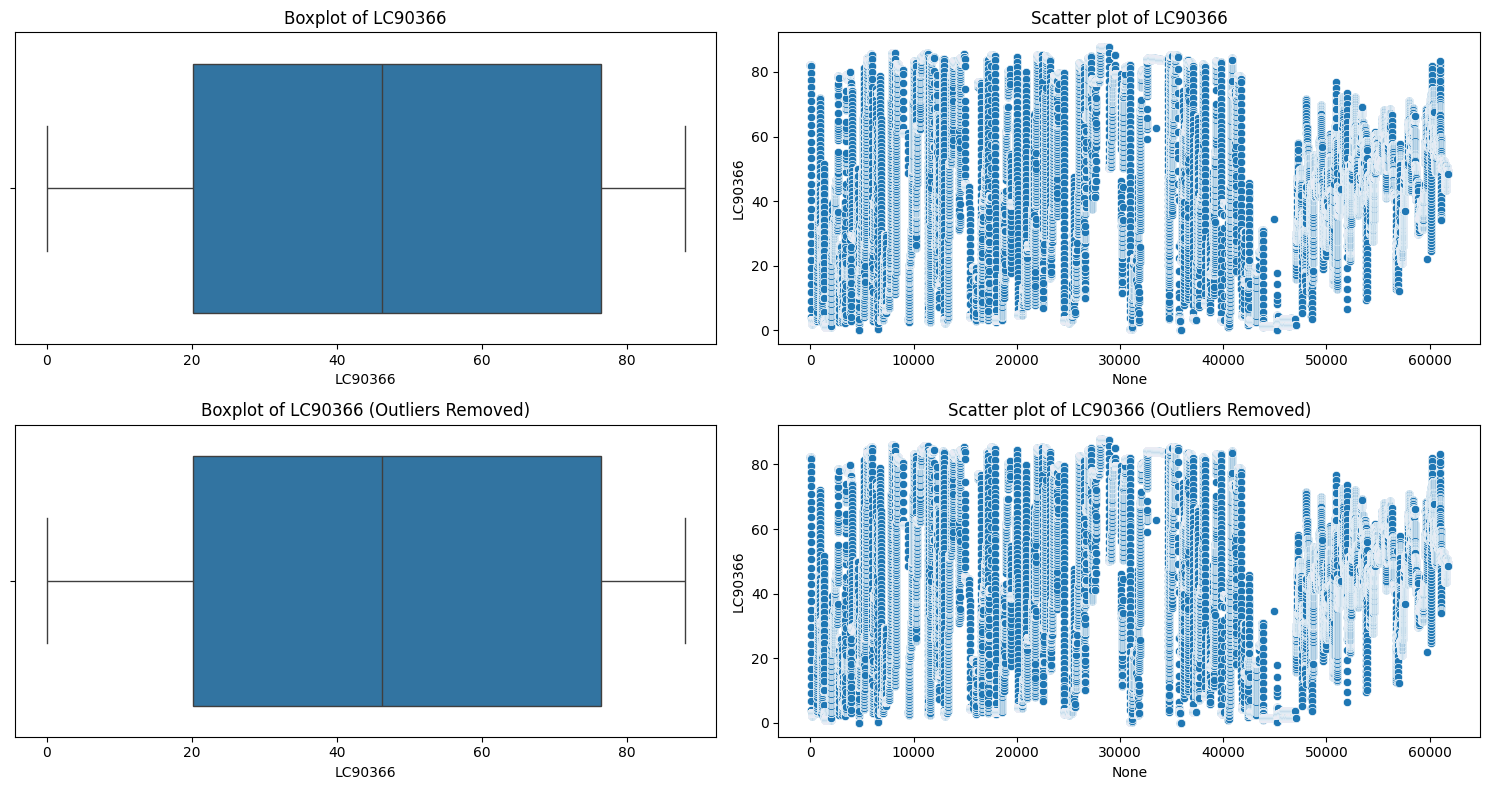

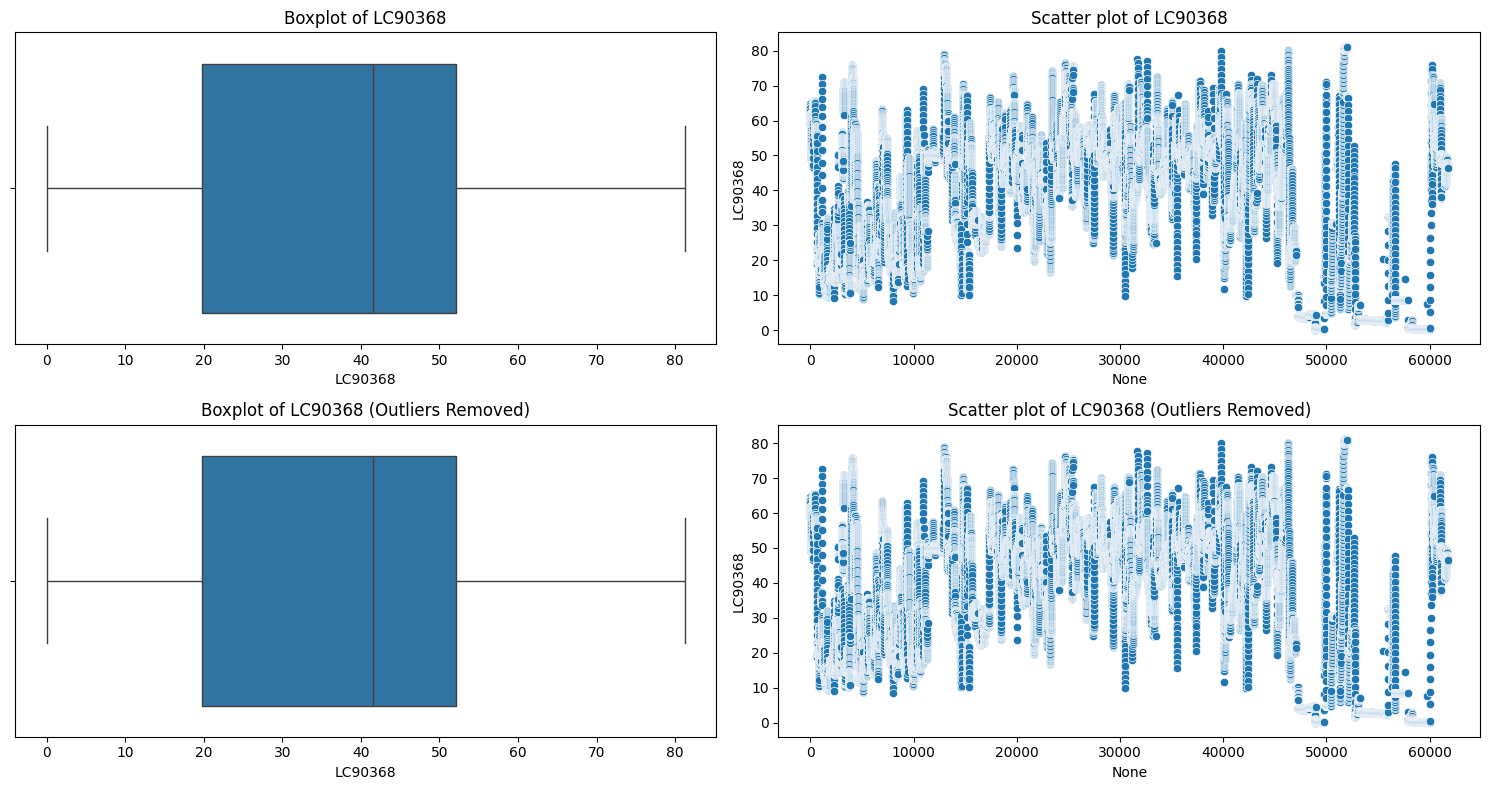

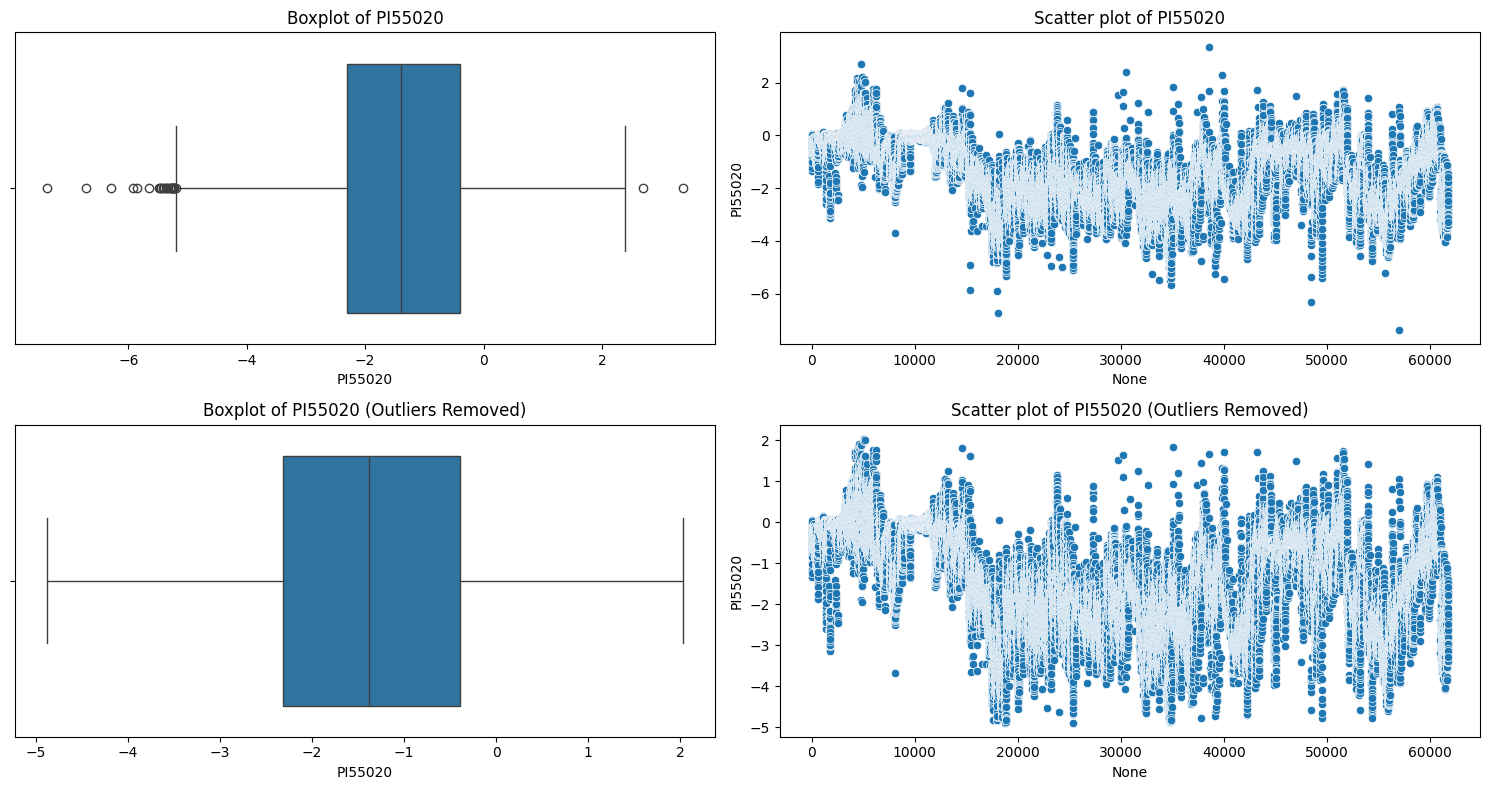

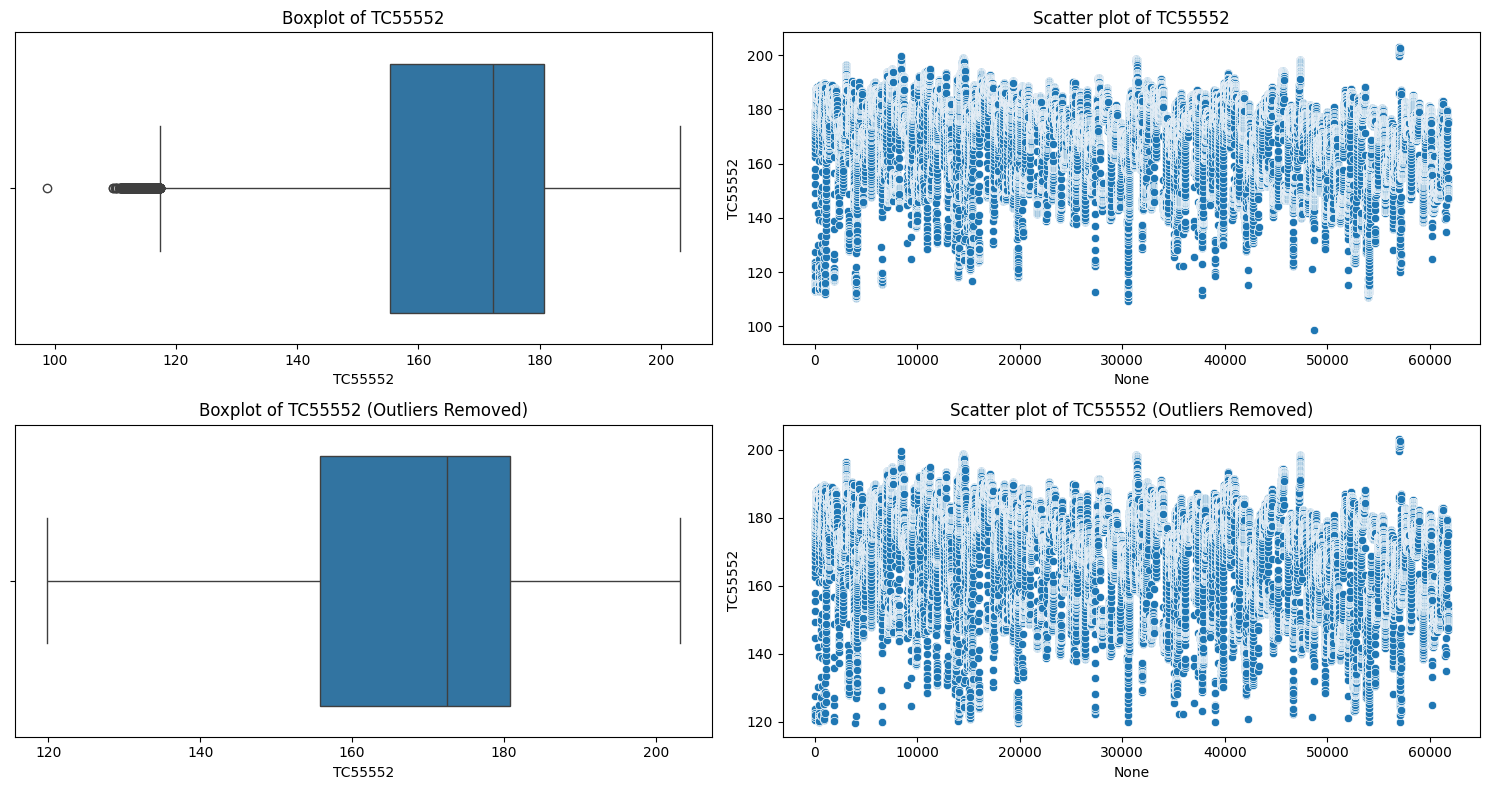

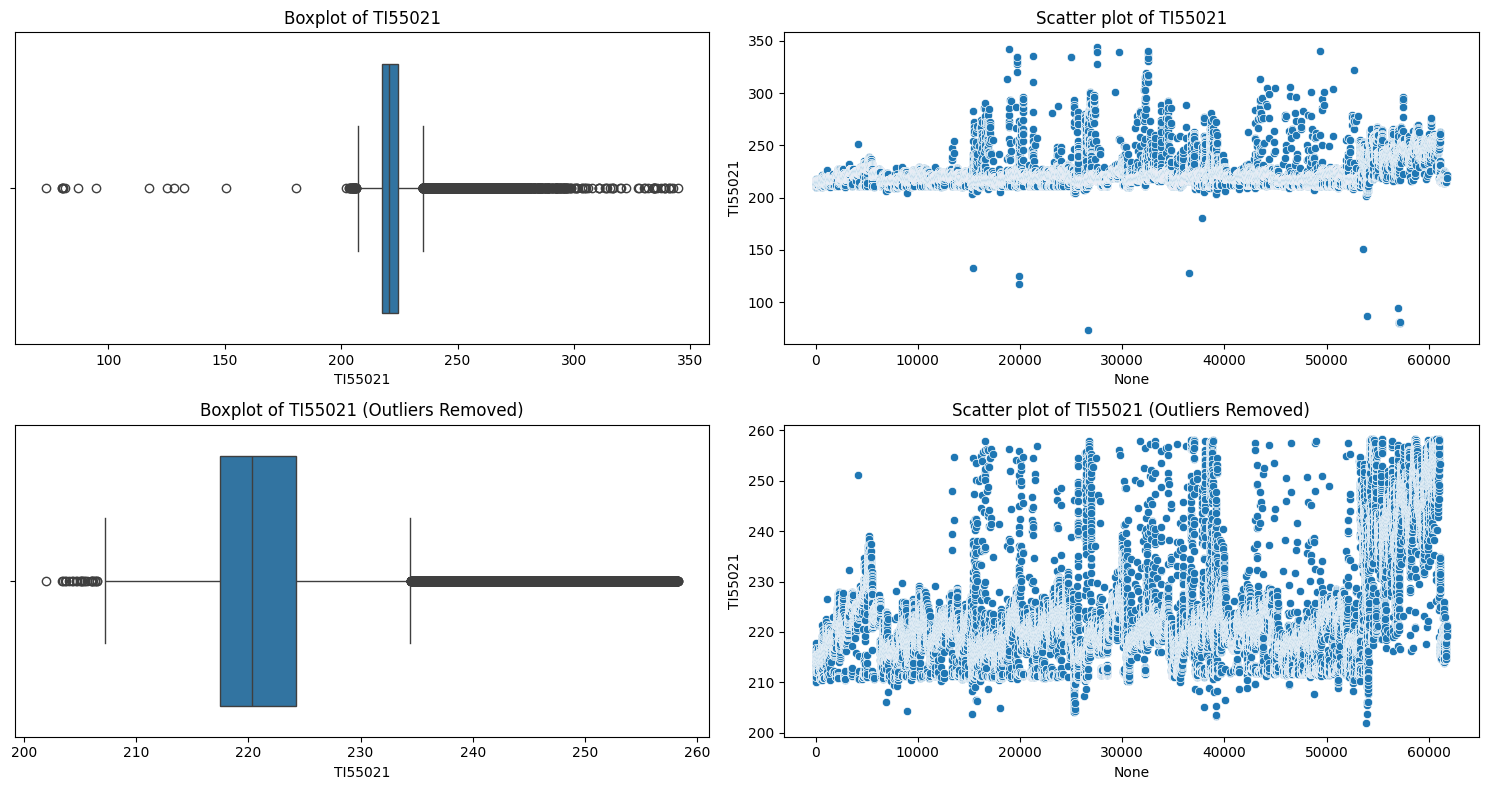

In [8]:

def plot_data(col, data):
    # Check for datetime column
    if pd.api.types.is_datetime64_any_dtype(data[col]):
        print(f"Skipping datetime column: {col}")
        return data[col], None

    # Remove outliers (> 3 standard deviations from the mean)
    mean_col = data[col].mean()
    std_col = data[col].std()
    filtered_col = data[col][((data[col] - mean_col) / std_col).abs() <= 3]

    plt.figure(figsize=(15, 8))

    plt.subplot(2, 2, 1)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")

    plt.subplot(2, 2, 2)
    sns.scatterplot(x=data[col].index, y=data[col])
    plt.title(f"Scatter plot of {col}")

    plt.subplot(2, 2, 3)
    sns.boxplot(x=filtered_col)
    plt.title(f"Boxplot of {col} (Outliers Removed)")

    plt.subplot(2, 2, 4)
    sns.scatterplot(x=filtered_col.index, y=filtered_col)
    plt.title(f"Scatter plot of {col} (Outliers Removed)")

    plt.tight_layout()
    plt.show()

    return data[col], filtered_col

# Initialize dictionaries to store data
df_plotted = {}
df_plotted_Outliers_removed = {}

# Loop through each column to plot the data
for col in df_outlierHandling.columns:
    plotted, plotted_filtered = plot_data(col, df_outlierHandling)
    df_plotted[col] = plotted
    if plotted_filtered is not None:
        df_plotted_Outliers_removed[col] = plotted_filtered

# Convert the dictionaries to DataFrames
df_plotted = pd.DataFrame(df_plotted)
df_plotted_Outliers_removed = pd.DataFrame(df_plotted_Outliers_removed)

# Ensure "Date" column is present in df_plotted_Outliers_removed
if "Date" in df_outlierHandling.columns and "Date" not in df_plotted_Outliers_removed.columns:
    df_plotted_Outliers_removed["Date"] = df_outlierHandling["Date"]


In [9]:
# def plot_data(col, data, remove_outliers=False):
#     if pd.api.types.is_datetime64_any_dtype(data[col]):
#         print(f"Skipping datetime column: {col}")
#         return data[col], data[col]  # keep datetime columns as they are

# def plot_data(col, data, remove_outliers=False):
#     if pd.api.types.is_datetime64_any_dtype(data[col]):
#         print(f"Skipping datetime column: {col}")
#         return data[col], None  # keep datetime columns as they are

#     # Remove outliers (> 3 standard deviations from the mean)
#     mean_col = data[col].mean()
#     std_col = data[col].std()
#     filtered_col = data[col][((data[col] - mean_col) / std_col).abs() <= 3]

#     plt.figure(figsize=(15, 8))

#     plt.subplot(2, 2, 1)
#     sns.boxplot(x=data[col])
#     plt.title(f"Boxplot of {col}")

#     plt.subplot(2, 2, 2)
#     sns.scatterplot(x=data[col].index, y=data[col])
#     plt.title(f"Scatter plot of {col}")

#     plt.subplot(2, 2, 3)
#     sns.boxplot(x=filtered_col)
#     plt.title(f"Boxplot of {col} (Outliers Removed)")

#     plt.subplot(2, 2, 4)
#     sns.scatterplot(x=filtered_col.index, y=filtered_col)
#     plt.title(f"Scatter plot of {col} (Outliers Removed)")

#     plt.tight_layout()
#     plt.show()

#     return data[col], filtered_col

# # Create empty dictionaries to hold the Series
# df_plotted = {}
# df_plotted_Outliers_removed = {}

# # Loop through each column to plot the data
# for col in df_outlierHandling.columns:
#     plotted, plotted_filtered = plot_data(col, df_outlierHandling, remove_outliers=True)
#     df_plotted[col] = plotted
#     if plotted_filtered is not None:
#         df_plotted_Outliers_removed[col] = plotted_filtered

# # Convert the dictionaries to DataFrames
# df_plotted = pd.DataFrame(df_plotted)
# df_plotted_Outliers_removed = pd.DataFrame(df_plotted_Outliers_removed)




In [10]:
df_outlierHandling = df_plotted_Outliers_removed.copy()

In [11]:
# Calculate the statistics for each column in df_outlierHandling
total_rows = len(df_outlierHandling)
non_nan_count = df_outlierHandling.count()
nan_count = df_outlierHandling.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_outlierHandling.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

## Plot
#nan_stats.set_index('ID')['nan_percentage'].plot(kind='bar')
#plt.ylabel('Percentage of NaNs')
#plt.title('Percentage of NaNs in each column')
#plt.show()\

                    ID  total_rows  non_nan_count  nan_count  nan_percentage
0              Decanol       61780          61008        772        1.249595
1           425_pct_Al       61780          61277        503        0.814179
2              M_Value       61780          61432        348        0.563289
3           C4_pct_Eth       61780          61543        237        0.383619
4           C4_pct_H2O       61780          61279        501        0.810942
5   HydWtr_pct_Ammonia       61780          60546       1234        1.997410
6           C4_pct_Hex       61780          60970        810        1.311104
7          HydWtr_Na2O       61780          61651        129        0.208805
8              DI55102       61780          61775          5        0.008093
9              DI55152       61780          61436        344        0.556815
10             FC55003       61780          60845        935        1.513435
11             FC55009       61780          61723         57        0.092263

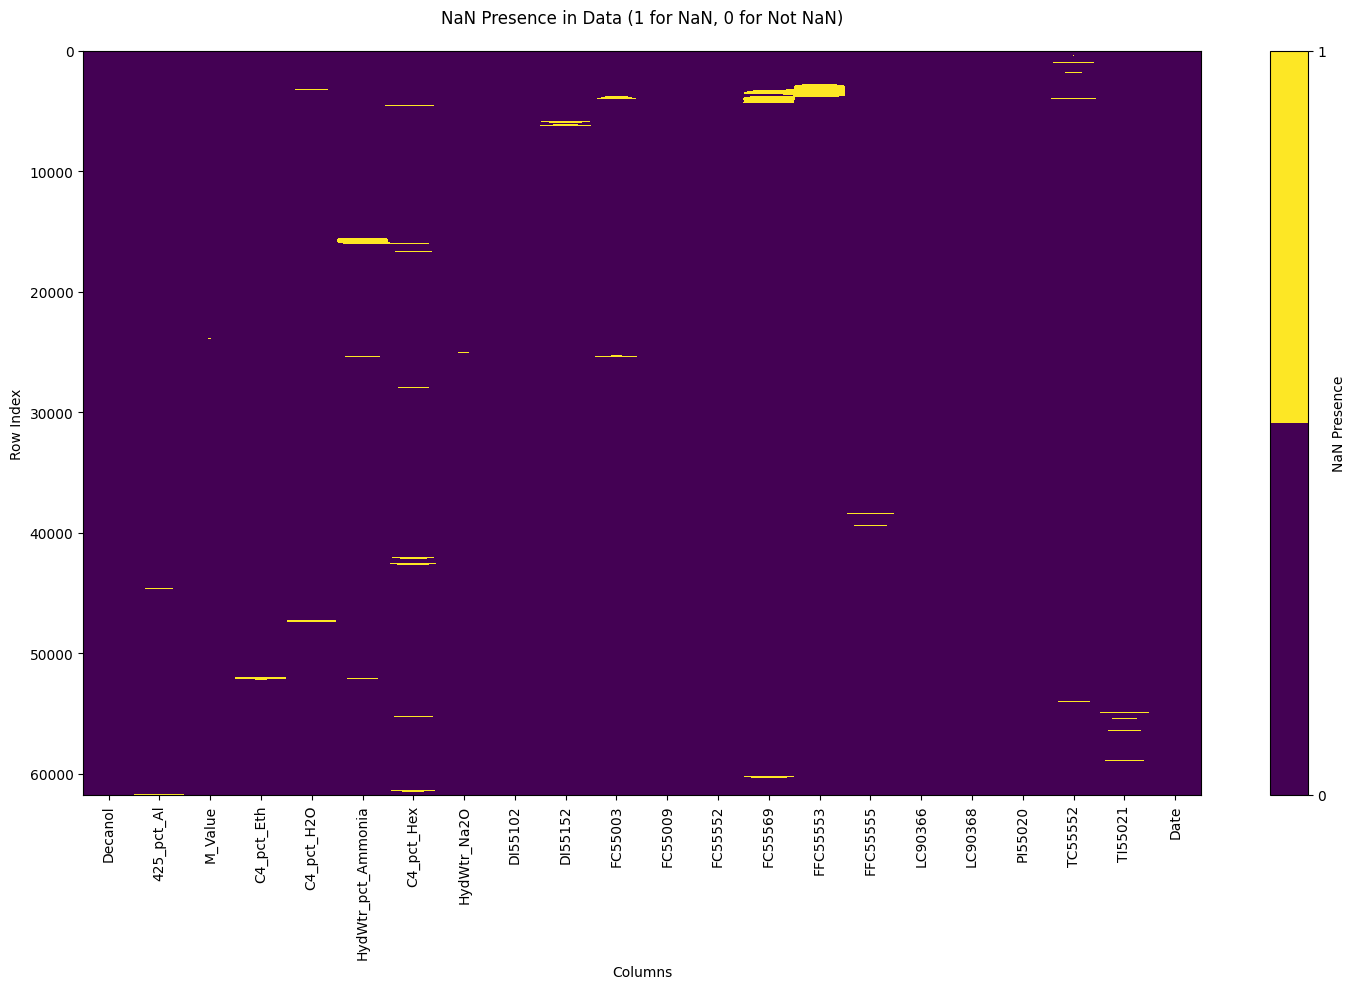

In [12]:


# Create a binary matrix to represent NaNs (1 for NaN, 0 for a number)
nan_matrix = np.where(df_outlierHandling.isna(), 1, 0)

fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
cmap = plt.get_cmap('viridis', 2)  # We use a colormap that differentiates between 0 and 1 clearly

# Plotting heatmap
cax = ax.imshow(nan_matrix, cmap=cmap, aspect='auto')

# Adding colorbar for reference
plt.colorbar(cax, ticks=[0, 1], label='NaN Presence')
plt.title("NaN Presence in Data (1 for NaN, 0 for Not NaN)", pad=20)

# To make the columns readable and vertical
plt.xticks(range(df_outlierHandling.shape[1]), df_outlierHandling.columns, rotation=90)  # rotation set to 90 for vertical labels

plt.xlabel('Columns')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()


In [13]:
df_outlierHandling = df_outlierHandling.dropna().copy()



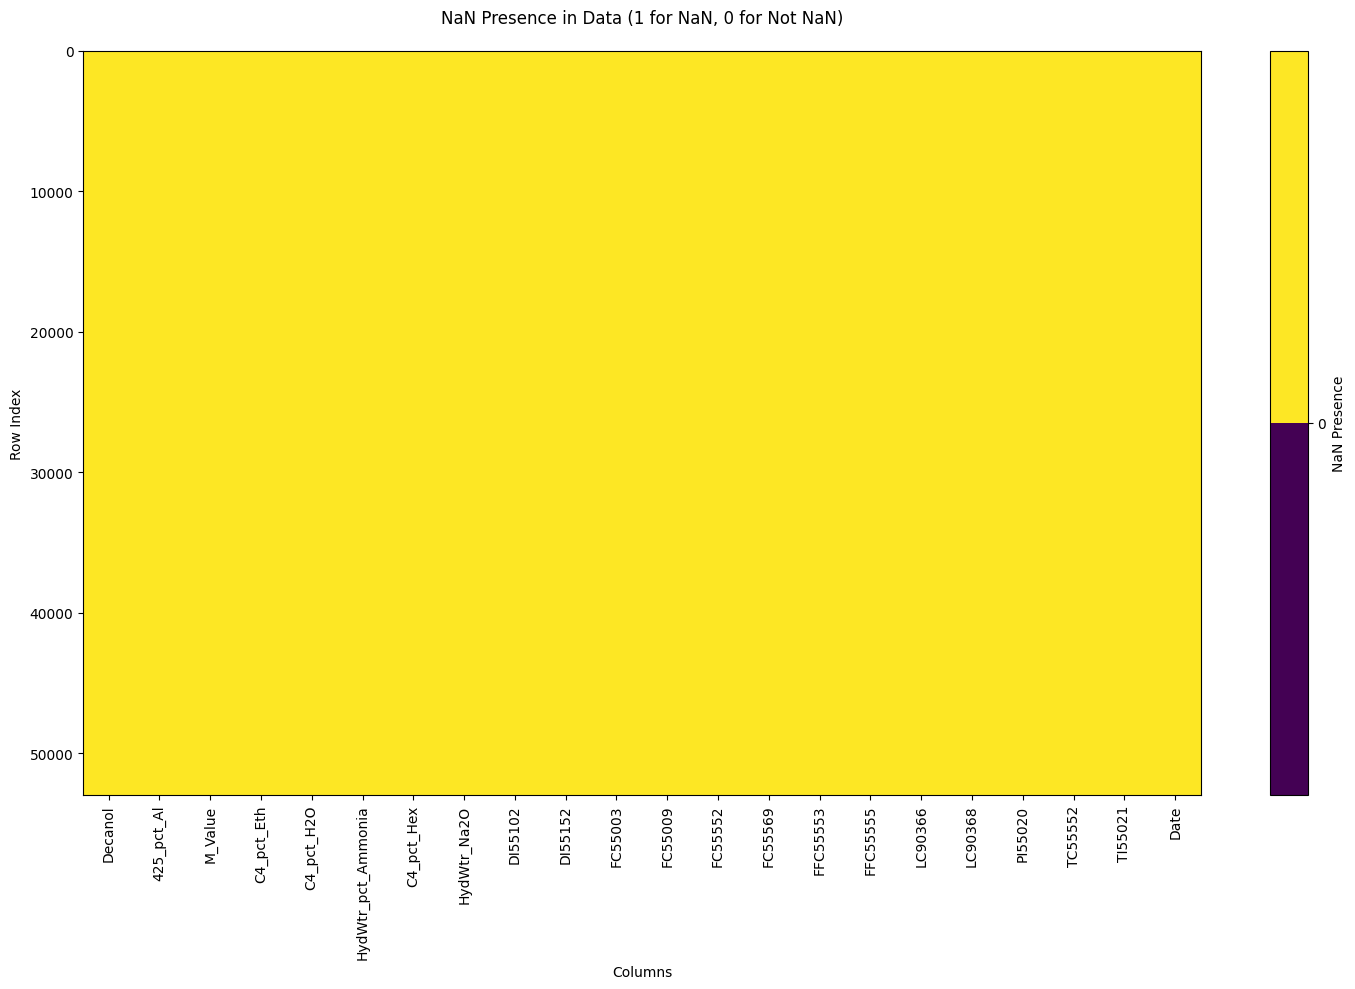

In [14]:


# Create a binary matrix to represent NaNs (1 for NaN, 0 for a number)
nan_matrix = np.where(df_outlierHandling.isna(), 1, 0)

fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
cmap = plt.get_cmap('viridis', 2)  # We use a colormap that differentiates between 0 and 1 clearly

# Plotting heatmap
cax = ax.imshow(nan_matrix, cmap=cmap, aspect='auto')

# Adding colorbar for reference
plt.colorbar(cax, ticks=[0, 1], label='NaN Presence')
plt.title("NaN Presence in Data (1 for NaN, 0 for Not NaN)", pad=20)

# To make the columns readable and vertical
plt.xticks(range(df_outlierHandling.shape[1]), df_outlierHandling.columns, rotation=90)  # rotation set to 90 for vertical labels

plt.xlabel('Columns')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()


In [15]:
# Calculate the statistics for each column in df_outlierHandling
total_rows = len(df_outlierHandling)
non_nan_count = df_outlierHandling.count()
nan_count = df_outlierHandling.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_outlierHandling.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

## Plot
#nan_stats.set_index('ID')['nan_percentage'].plot(kind='bar')
#plt.ylabel('Percentage of NaNs')
#plt.title('Percentage of NaNs in each column')
#plt.show()\

                    ID  total_rows  non_nan_count  nan_count  nan_percentage
0              Decanol       52974          52974          0             0.0
1           425_pct_Al       52974          52974          0             0.0
2              M_Value       52974          52974          0             0.0
3           C4_pct_Eth       52974          52974          0             0.0
4           C4_pct_H2O       52974          52974          0             0.0
5   HydWtr_pct_Ammonia       52974          52974          0             0.0
6           C4_pct_Hex       52974          52974          0             0.0
7          HydWtr_Na2O       52974          52974          0             0.0
8              DI55102       52974          52974          0             0.0
9              DI55152       52974          52974          0             0.0
10             FC55003       52974          52974          0             0.0
11             FC55009       52974          52974          0             0.0

In [16]:
# 40127  - All Tags included - 3/9/24

num_columns = df_outlierHandling.shape[1]
print("Number of features:", num_columns)

Number of features: 22


## Add Columns to Describe Butanol and Decanol Content

Binary data must be added after Outlier handleing :) 

In [17]:
# Add new column 'B', with 1 if 'A' > 25, else 0
# df_outlierHandling['C4_Spec'] = np.where(df_outlierHandling['Butanol'] < 62, 1, 0)
# df_outlierHandling['C10_Spec'] = np.where(df_outlierHandling['Decanol'] < 5, 1, 0)

In [18]:
df_outlierHandling.to_csv('contData_clean.csv', index=False)

df_outlierHandling.columns

Index(['Decanol', '425_pct_Al', 'M_Value', 'C4_pct_Eth', 'C4_pct_H2O',
       'HydWtr_pct_Ammonia', 'C4_pct_Hex', 'HydWtr_Na2O', 'DI55102', 'DI55152',
       'FC55003', 'FC55009', 'FC55552', 'FC55569', 'FFC55553', 'FFC55555',
       'LC90366', 'LC90368', 'PI55020', 'TC55552', 'TI55021', 'Date'],
      dtype='object')

In [19]:
saoSelect = ['Date', '425_pct_Al', 'M_Value',
            #  'Al2O3',  
             'C4_pct_Eth', 'C4_pct_H2O', 'HydWtr_pct_Ammonia', 
             'C4_pct_Hex', 
             'HydWtr_Na2O']

fb554Select = ['Date',  'Decanol',
            #    'Butanol', 'Ethanol', 'Hexanol', 'Octanol'
               ]

unitSelect = ['Date', 
    #           'DI55102', 'DI55152',
       'FC55003', 'FC55009', 'FC55552', 'FC55569', 'FFC55553', 'FFC55555',
       'LC90366', 'LC90368', 'PI55020', 'TC55552', 'TI55021'

              ]





df_clean_425 = df_outlierHandling[saoSelect].copy()

df_clean_554 = df_outlierHandling[fb554Select].copy()

df_clean_unit = df_outlierHandling[unitSelect].copy()

num_columns_425 = df_clean_425.shape[1]
num_columns_554 = df_clean_554.shape[1]
num_columns_unit = df_clean_unit.shape[1]
num_columns_total = num_columns_554 + num_columns_425 + num_columns_unit


print("Number of features:", num_columns_total)

print("Number of features - ['Date']*2:", num_columns_total-2)


Number of features: 22
Number of features - ['Date']*2: 20


In [20]:
# df_clean_425.to_csv(r'C:\Users\steve\OneDrive\1. BAIUTEK\Project-OptiC4\1 Preprocess\Continuous Data\cont_425Data_clean.csv', index=False)

# df_clean_554.to_csv(r'C:\Users\steve\OneDrive\1. BAIUTEK\Project-OptiC4\1 Preprocess\Continuous Data\cont_554Data_clean.csv', index=False)

# df_clean_unit.to_csv(r'C:\Users\steve\OneDrive\1. BAIUTEK\Project-OptiC4\1 Preprocess\Continuous Data\cont_unitData_clean.csv', index=False)


In [21]:
# bordeCode

df_clean_425.to_csv(r'C:\Users\austinsh\Project-OptiC4\III Models\3 Model C10\5 Preprocessing - Slecected Features\Continuous Data\cont_425Data_clean.csv', index=False)

df_clean_554.to_csv(r'C:\Users\austinsh\Project-OptiC4\III Models\3 Model C10\5 Preprocessing - Slecected Features\Continuous Data\cont_554Data_clean.csv', index=False)

df_clean_unit.to_csv(r'C:\Users\austinsh\Project-OptiC4\III Models\3 Model C10\5 Preprocessing - Slecected Features\Continuous Data\cont_unitData_clean.csv', index=False)

In [22]:
from datetime import datetime

# Get the current date and time
current_date_time = datetime.now()

# Print the current date and time
print(current_date_time)


2024-05-06 01:02:35.710618
